最終更新日:2023/01/15
# 回帰タスクにおける評価指標
- $N$:レコード数
- $y_i$: $i$-th レコードの真値
- $\hat{y}_i$: $i$-th レコードの予測値

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, r2_score

## RMSE
- 回帰タスクで最も代表的な評価指標
$$
    \textrm{RMSE} = \sqrt{\frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2}
$$

In [8]:
y_true = np.array([1.0, 1.5, 2.0, 1.2, 1.8])
y_pred = np.array([0.8, 1.5, 1.8, 1.3, 3.0])

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"rmse: {rmse:.4f}")

rmse: 0.5532


## RMSLE
- 目的変数の対数を新たな目的変数としたrmse
- 大きな値の影響が強い場合、真値と予測値の比率に着目したい場合などで使用
$$
    \textrm{RMSLE} = \sqrt{\frac{1}{N} \sum_{i=1}^N (\log(1+y_i) - \log(1+\hat{y}_i))^2}
$$

In [9]:
y_true = np.array([100, 0, 400])
y_pred = np.array([200, 10, 200])

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
rmsle = np.sqrt(mean_squared_log_error(y_true, y_pred))

print(f'rmse: {rmse:.4f}, rmsle: {rmsle:.4f}')

rmse: 129.2285, rmsle: 1.4945


## MAE
- 外れ値の影響を低減した評価に適した指標
$$
    \textrm{MAE} = \frac{1}{N} \sum_{i=1}^N |y_i - \hat{y}_i|
$$

In [13]:
y_true = np.array([100, 160, 60])
y_pred = np.array([80, 100, 100])

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print(f'rmse: {rmse:.4f}, mae: {mae:.4f}')

rmse: 43.2049, mae: 40.0000


## 決定係数($R^2$)
- 回帰分析の当てはまりの良さを表す
- $R^2$を最大化する $=$ RMSEを最小化する
$$
\begin{align*}
    R^2 =& 1 - \frac{\sum_{i=1}^N (y_i - \hat{y}_i)^2}{\sum_{i=1}^N (y_i - \bar{y})^2},\\
    \bar{y} =& \frac{1}{N} \sum_{i=1}^N y_i
\end{align*}
$$

In [18]:
y_true = np.array([1.0, 1.5, 2.0, 1.2, 1.8])
y_pred = np.array([0.8, 1.5, 1.8, 1.3, 3.0])

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)
print(f"rmse: {rmse:.4f}, r2: {r2:.4f}")

rmse: 0.5532, r2: -1.2500


## RMSEとMAEの特徴
- 一つの代表値で予測を行う場合
    - RMSEを最小にする予測値は***平均値***
    - MAEを最小にする予測値は***中央値***

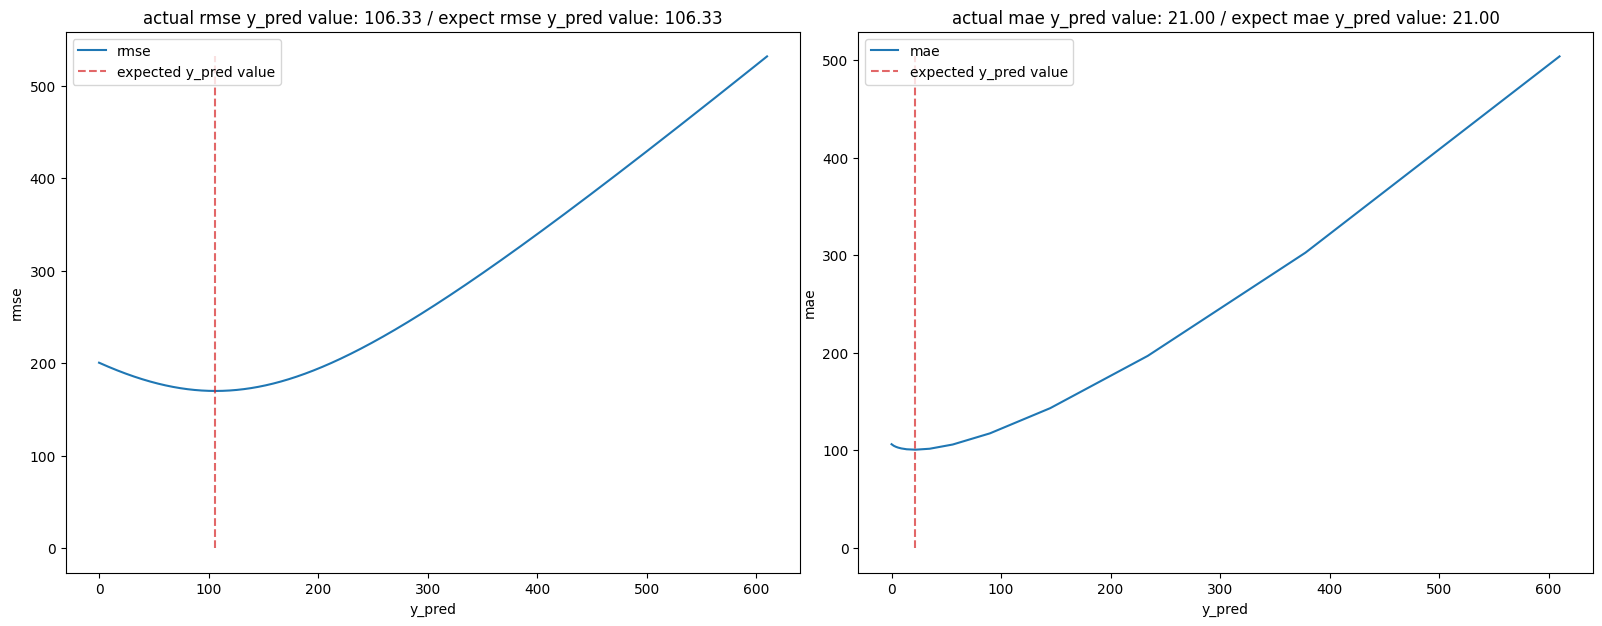

In [104]:
# 確認

def fib(n):
    f_0, f_1 = 0, 1
    if n == 0:
        return f_0
    if n == 1:
        return f_1
    for _ in range(n):
        f_0, f_1 = f_1, f_1 + f_0
    return f_1

# Fibonacciをdataとしてみる
y_true = [fib(n) for n in range(15)]

# 各metricを最小にする値
expect_values = {}
expect_values['rmse'] = np.mean(y_true)
expect_values['mae'] = np.median(y_true)

# [0, max]の値１つを予測値とする
# 小数２桁までの精度で確認
y_preds = np.linspace(0, np.max(y_true), np.max(y_true)*100)

# 各予測値に対してmetricの値を計算
metrics = {}
metrics['rmse'] = [np.sqrt(mean_squared_error(y_true, np.ones_like(y_true) * y_pred)) for y_pred in y_preds]
metrics['mae'] = [mean_absolute_error(y_true, np.ones_like(y_true) * y_pred) for y_pred in y_preds]

fig, axes = plt.subplots(1, 2, figsize=(8*2, 6))
fig.tight_layout()
for i, (name, vals) in enumerate(metrics.items()):
    axes[i].plot(y_preds, vals, label=name)
    axes[i].set_xlabel('y_pred')
    axes[i].set_ylabel(name)
    min_val = np.min(vals)
    y_min = y_preds[np.where(vals == min_val)[0][0]]
    axes[i].set_title(f'actual {name} y_pred value: {y_min:.2f} / expect {name} y_pred value: {expect_values[name]:.2f}')
    axes[i].vlines(x=expect_values[name], ymin=0, ymax=np.max(vals), 
        colors="tab:red", linestyles='dashed', alpha=0.7, label='expected y_pred value')
    axes[i].legend()
plt.show()